In [1]:
S0 = 100.
r = 0.04
sigma = 0.02

In [2]:
import numpy as np

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
# analytical formula for stock price
stockprice = lambda S0, r, sigma, t, z: S0*np.exp((r-0.5*sigma*sigma)*t+sigma*z*np.sqrt(t))

In [5]:
tarray = np.arange(100)/10.
zarray = np.random.normal(size=100)
sarray = stockprice(S0, r, sigma, tarray, zarray)

stockprice(S0, r, sigma, tarray, zarray) 

array([100.        , 100.6907538 , 101.02549065, 101.48689289,
        99.65888201,  99.88984307, 104.43429371, 103.29983159,
       104.70498022, 103.26427712, 106.87864739, 108.53061441,
       106.08537729, 104.35575577, 102.61249779, 104.48133939,
       112.86320719, 103.39771661, 102.25757623, 109.2286073 ,
       106.23025132, 106.86599215, 104.95259695, 111.50182689,
       105.36580598, 113.83398871, 109.30201743, 117.26991574,
       112.65225968, 107.83193531, 108.24805166, 116.2096034 ,
       115.365903  , 116.74351893, 116.06122391, 109.64232491,
       114.01365557, 103.98675546, 114.77529696, 116.37993833,
       112.75928727, 122.25932029, 121.20461843, 119.91853438,
       125.19068396, 118.10715209, 122.22091713, 131.86838072,
       129.63184857, 125.13951444, 115.15666757, 120.94781406,
       129.89203077, 119.64633625, 125.01544283, 121.99342623,
       126.88695501, 126.81365479, 130.09363062, 136.59370038,
       121.69623715, 120.40256327, 129.82879639, 135.30

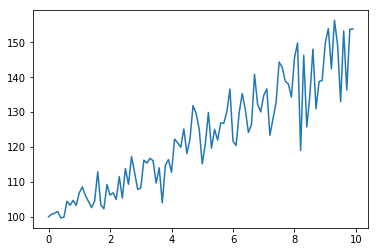

In [6]:
plt.plot(tarray, sarray)

In [31]:
from pymc3 import Model, Normal, HalfNormal

stockprice_model = Model()

with stockprice_model:
    rnd_S0 = Normal('rnd_S0', mu=100, sd=10)
    rnd_r = HalfNormal('rnd_r', sd=0.02)
    rnd_sigma = HalfNormal('rnd_sigma', sd=0.002)
    
    # formula
    mu_observed_S = stockprice(rnd_S0, rnd_r, rnd_sigma, tarray, 0)
    
    # model
    observed_S = Normal('observed_S', mu=mu_observed_S, sd=rnd_sigma, observed=sarray)

In [32]:
from pymc3 import NUTS, sample, find_MAP
from scipy.optimize import fmin_l_bfgs_b

with stockprice_model:
    start = find_MAP(fmin=fmin_l_bfgs_b)
    step = NUTS(scaling=start)
    trace = sample(2000, step, start=start)

logp = -42,177:   1%|          | 30/5000 [00:00<00:07, 694.03it/s]     
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [rnd_sigma, rnd_r, rnd_S0]
The number of effective samples is smaller than 25% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fb08690>,
      dtype=object)

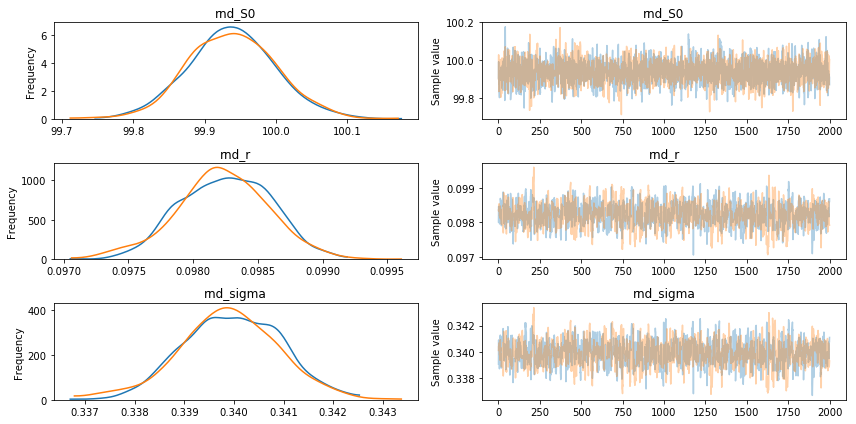

In [33]:
from pymc3 import traceplot

traceplot(trace, [rnd_S0, rnd_r, rnd_sigma])

In [34]:
trace[rnd_S0][-1]

100.00220635318291

In [35]:
trace[rnd_r][-1]

0.09791994395662977

In [36]:
trace[rnd_sigma][-1]

0.3393193377525004